<a href="https://colab.research.google.com/github/AlBelarmino/Numerical-and-Symbolic-Computation/blob/main/lab2_titanic_Belarmino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [4]:
# Fill Age with median
df["Age"] = df["Age"].fillna(df["Age"].median())
# Drop Cabin column (too many missing values)
df.drop(columns=["Cabin"], inplace=True)

In [5]:
# Check for duplicates
df.duplicated().sum()

# Remove duplicates
df.drop_duplicates(inplace=True)

In [6]:
# Convert Survived and Pclass to categorical
df["Survived"] = df["Survived"].astype("category")
df["Pclass"] = df["Pclass"].astype("category")

In [7]:
# Convert all column names to lowercase
df.columns = df.columns.str.lower()

In [8]:
df.to_csv("titanic_cleaned.csv", index=False)

**1. What are your steps in cleaning the dataset?**

- Load the Data: Import the dataset using Pandas and check the first few rows.

- Understand the Data: Use df.info(), df.describe(), and df.columns to examine structure, data types, and summary statistics.
- Check for Missing Values: Identify missing values using df.isnull().sum().
- Handle Missing Values: Fill missing Age values with the median and drop the Cabin column due to excessive missing data.
- Remove Duplicates: Detect and remove duplicate rows to ensure unique records.
- Fix Data Types: Convert Survived and Pclass to categorical data to optimize memory usage.
- Standardize Column Names: Convert all column names to lowercase for consistency.
- Save the Cleaned Dataset: Export the cleaned data as a CSV file for further analysis.

**Why did you choose the algorithm that you used in cleaning the dataset?**

  - Using the median to fill in missing values is preferable for numerical data, as it is less affected by outliers compared to the mean, which can be distorted by extreme values. It is essential to eliminate columns with a high degree of missing data, such as Cabin, when they offer minimal analytical benefit. Furthermore, getting rid of duplicates helps preserve data integrity, and changing categorical columns can decrease memory consumption and improve analysis efficiency.



In [9]:
import matplotlib.pyplot as plt

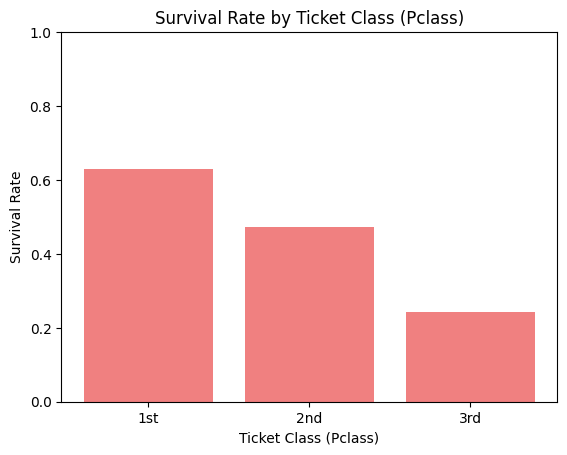

In [10]:
df["survived"] = df["survived"].astype(int)
pclass_survival = df.groupby("pclass", observed=True)["survived"].mean()
plt.bar(pclass_survival.index, pclass_survival.values, color="lightcoral")
plt.title("Survival Rate by Ticket Class (Pclass)")
plt.xlabel("Ticket Class (Pclass)")
plt.ylabel("Survival Rate")
plt.xticks(pclass_survival.index, labels=["1st", "2nd", "3rd"])
plt.ylim(0, 1)
plt.show()

**2. Create at least two (2) basic data analysis on two (2) columns in the dataset. Be creative and critical in deriving the insights on the data. You can show the visualization used to derive the insights.**

- Wealthier passengers had better cabin positions, quicker access to lifeboats, and probably greater rescue priority, while third-class passengers faced structural challenges such as being positioned in lower decks and restricted movement due to class segregation. This highlights the necessity for contemporary policies that guarantee fair evacuation and emergency response for all social groups in order to avoid future inequalities. It also exposes a systematic discrepancy in a disaster survival.

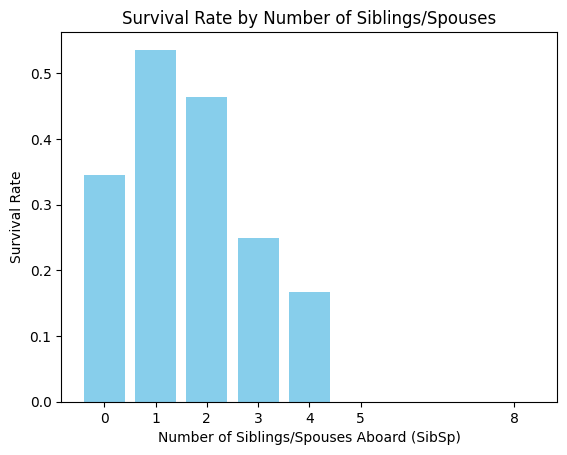

In [11]:
df["survived"] = df["survived"].astype(int)
sibsp_survival = df.groupby("sibsp")["survived"].mean()
plt.bar(sibsp_survival.index, sibsp_survival.values, color="skyblue")
plt.title("Survival Rate by Number of Siblings/Spouses")
plt.xlabel("Number of Siblings/Spouses Aboard (SibSp)")
plt.ylabel("Survival Rate")
plt.xticks(sibsp_survival.index)
plt.show()

**2. Create at least two (2) basic data analysis on two (2) columns in the dataset. Be creative and critical in deriving the insights on the data. You can show the visualization used to derive the insights.**

- Passengers with 1 or 2 siblings/spouses had the highest survival rates (above 45%), suggesting that small family groups may have helped each other during evacuation. In contrast, solo travelers (SibSp = 0) had a lower survival rate (~35%), indicating that passengers without family support may have struggled to secure lifeboats. However, survival rates dropped significantly for larger families (SibSp ≥ 3) to below 25%, likely because they faced difficulties staying together or had to make difficult choices about who could board lifeboats.